In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")

#  Problem Statement:

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all  irrespective of any status. You are required to analyze this health and medical data for better future preparation. 

Do ETL: Extract- Transform and Load data from the heart disease diagnostic database  You can perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age. You can even compare attributes of the data set to extract necessary information. Make the necessary dashboard with the best you can extract from the data. Use various visualization and features and make the best dashboard Find key metrics and factors and show the meaningful relationships between attributes. 

In [4]:
# ETL Module
def load_data(file_path):
    """Load the dataset from the specified file path."""
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None

def transform_data(data):
    """Clean and preprocess the dataset."""
    # Drop duplicate rows
    data = data.drop_duplicates()

    # Handle missing values
    if data.isnull().sum().any():
        print("Missing values detected. Filling with mean...")
        data = data.fillna(data.mean())

    # Encode categorical columns
    data['sex'] = data['sex'].map({0: 'Female', 1: 'Male'})
    data['target'] = data['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    return data

def save_transformed_data(data, output_path):
    """Save the transformed data."""
    data.to_csv(output_path, index=False)
    print(f"Transformed data saved to {output_path}")


In [5]:
def perform_eda(data):
    """Perform exploratory data analysis and visualization."""
    print("Dataset Overview:")
    print(data.info())
    print("\nSummary Statistics:")
    print(data.describe())

    # Univariate Analysis
    plt.figure(figsize=(8, 6))
    sns.countplot(data['target'], palette='coolwarm')
    plt.title("Heart Disease Distribution")
    plt.show()

    # Bivariate Analysis: Gender vs. Heart Disease
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sex', hue='target', data=data, palette='viridis')
    plt.title("Heart Disease by Gender")
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

    # Scatter plot for Cholesterol and Maximum Heart Rate
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='chol', y='thalach', hue='target', data=data, palette='Set1')
    plt.title("Cholesterol vs. Maximum Heart Rate by Heart Disease")
    plt.show()


In [6]:
def perform_eda(data):
    """Perform exploratory data analysis and visualization."""
    print("Dataset Overview:")
    print(data.info())
    print("\nSummary Statistics:")
    print(data.describe())

    # Univariate Analysis
    plt.figure(figsize=(8, 6))
    sns.countplot(data['target'], palette='coolwarm')
    plt.title("Heart Disease Distribution")
    plt.show()

    # Bivariate Analysis: Gender vs. Heart Disease
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sex', hue='target', data=data, palette='viridis')
    plt.title("Heart Disease by Gender")
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 8))
    numeric_data = data.select_dtypes(include=[np.number])  # Select numeric columns
    corr = numeric_data.corr()  # Correlation on numeric data only
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

    # Scatter plot for Cholesterol and Maximum Heart Rate
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='chol', y='thalach', hue='target', data=data, palette='Set1')
    plt.title("Cholesterol vs. Maximum Heart Rate by Heart Disease")
    plt.show()


In [7]:
def save_eda_outputs(data, output_path):
    """Save visualizations or analysis outputs."""
    # Save summary statistics as a CSV
    summary = data.describe()
    summary.to_csv(os.path.join(output_path, "summary_statistics.csv"))
    print("EDA outputs saved!")


In [8]:
# Using Streamlit for interactive dashboard
import streamlit as st

def create_dashboard(data):
    """Create a Streamlit dashboard for data visualization."""
    st.title("Heart Disease Diagnostic Dashboard")

    # Interactive Filters
    st.sidebar.header("Filters")
    gender_filter = st.sidebar.selectbox("Select Gender", ['Male', 'Female', 'All'])

    # Filter data based on user input
    filtered_data = data if gender_filter == 'All' else data[data['sex'] == gender_filter]

    # Show distribution of heart disease
    st.write("### Heart Disease Distribution")
    st.bar_chart(filtered_data['target'].value_counts())

    # Correlation Matrix
    st.write("### Correlation Matrix")
    st.write(filtered_data.corr())


Data loaded successfully!
Transformed data saved to Transformed_Heart_Disease_Data.csv
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 35.4+ KB
None

Summary Statistics:
             age          cp    trestbps        chol         fbs     restecg  \
c

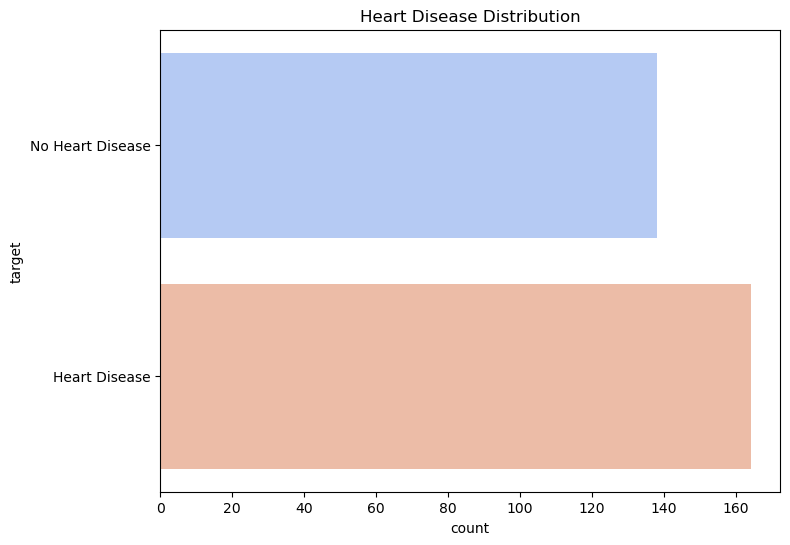

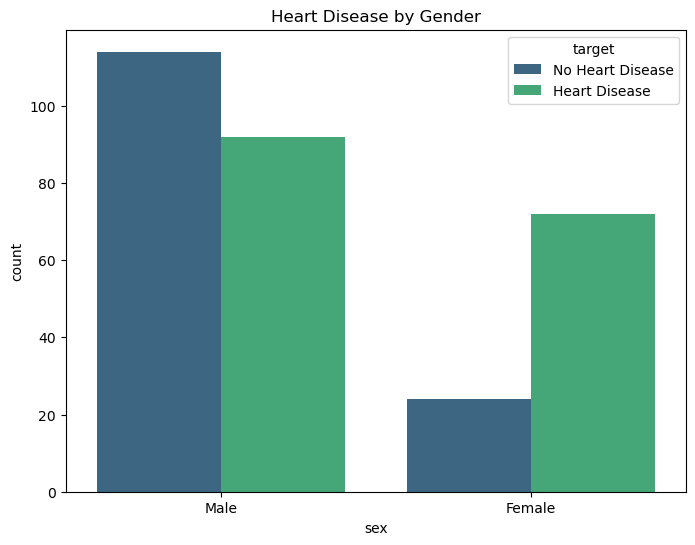

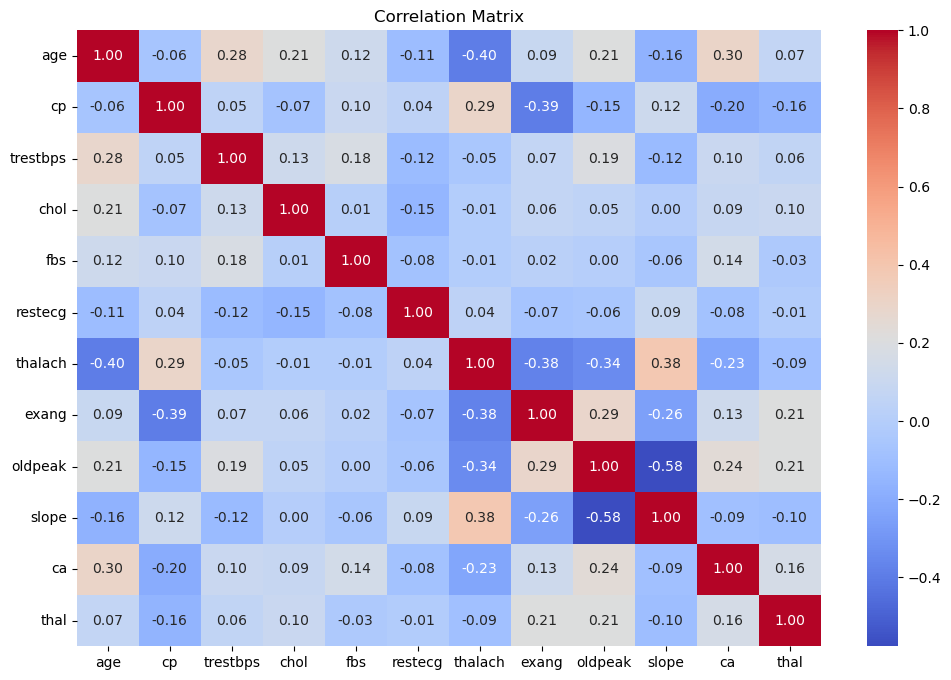

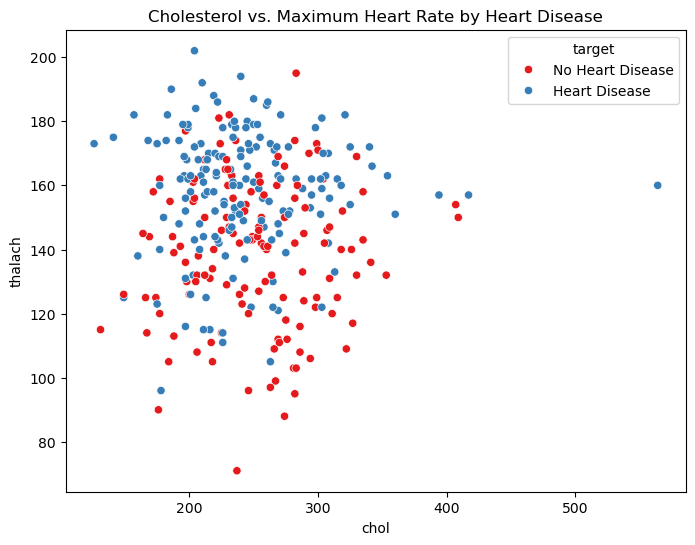

EDA outputs saved!


In [9]:
def main():
    """Main function to execute the project workflow."""
    # Paths
    input_file = "C:/Users/nikhi/OneDrive/Desktop/Heart Disease Diagnostic Analysis/Datasets/Heart Disease data/Heart Disease data.csv"
    output_file = "Transformed_Heart_Disease_Data.csv"
    eda_output_folder = "EDA_Outputs"

    # Ensure output directories exist
    if not os.path.exists(eda_output_folder):
        os.makedirs(eda_output_folder)

    # ETL Process
    data = load_data(input_file)
    if data is not None:
        data = transform_data(data)
        save_transformed_data(data, output_file)

        # Perform EDA
        perform_eda(data)
        save_eda_outputs(data, eda_output_folder)

        # Optional Dashboard
        # create_dashboard(data)

# Execute the main function
if __name__ == "__main__":
    main()
